# Image Processing in Python
Images are everywhere! We live in a time where images contain lots of information, which is sometimes difficult to obtain. This is why image pre-processing has become a highly valuable skill, applicable in many use cases. In this course, you will learn to process, transform, and manipulate images at your will, even when they come in thousands. You will also learn to restore damaged images, perform noise reduction, smart-resize images, count the number of dots on a dice, apply facial detection, and much more, using scikit-image. After completing this course, you will be able to apply your knowledge to different domains such as machine learning and artificial intelligence, machine and robotic vision, space and medical image analysis, retailing, and many more. Take the step and dive into the wonderful world that is computer vision!

# $\star$ Chapter 1: Introducing Image Processing and scikit-image
Jump into digital image structures and learn to process them! Extract data, transform and analyze images using NumPy and Scikit-image. With just a few lines of code, you will convert RGB images to grayscale, get data from them, obtain histograms containing very useful information, and separate objects from the background!

### Make images come alive with scikit-image

#### What is image processing?
* Image processing is a method to perform operations on images, in order to **enhance them** or **extract useful information**, **analysis**, and **decision-making.**
* By quantifying the information in images, we can make calculations.
* **Image processing is a subset of computer vision.**

#### Applications
* Analysis of medical images
* Artifical intelligence
* Image restoration
* Geospatial computing
* Surveillance
* Much, much more...

#### Purposes
* The purpose of image processing can be divided into five groups:
    * **1) Visualization:**
        * Observe objects that are not visible
    * **2) Image sharpening and restoration:**
        * To create a better image
    * **3) Image retrieval:**
        * Seek the image of interest
    * **4) Measurement of patter:**
        * Measure various objects
    * **5) Image Recognition:**
        * To distinguish objects in an image
        
#### Intro to scikit-image
* Easy to use
* Makes use of Machine Learning (and its built-in functions)
* Out of the box complex algorithms

#### What is an image?
* **A digital image is an array, or a matrix, of square pixels (picture elements) arranged in columns and rows.**
* In other words, a 2-dimensional matrix.
* These pixels contain information about color and intensity
* There are some testing-purpose images provided by scikit-image, in a module called `data`.

#### Import all packages:

```
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from skimage.filters import try_all_threshold
from skimage.filters import threshold_otsu
from skimage.filters import threshold_local
from skimage.filters import sobel
from skimage.filters import gaussian
```

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

In [2]:
rocket_image = data.rocket()

In [4]:
rocket_image

array([[[ 17,  33,  58],
        [ 17,  33,  58],
        [ 17,  33,  59],
        ...,
        [  8,  19,  37],
        [  8,  19,  37],
        [  7,  18,  36]],

       [[ 17,  33,  58],
        [ 17,  33,  58],
        [ 17,  33,  59],
        ...,
        [  8,  19,  37],
        [  8,  19,  37],
        [  8,  19,  37]],

       [[ 18,  34,  59],
        [ 18,  34,  59],
        [ 18,  34,  60],
        ...,
        [  8,  19,  37],
        [  8,  19,  37],
        [  8,  19,  37]],

       ...,

       [[ 27,  28,  32],
        [ 29,  29,  37],
        [ 20,  24,  36],
        ...,
        [136, 106,  82],
        [186, 136,  85],
        [173, 119,  81]],

       [[ 26,  27,  31],
        [ 29,  32,  39],
        [ 30,  34,  46],
        ...,
        [103,  67,  45],
        [ 97,  61,  27],
        [ 76,  49,  20]],

       [[ 26,  27,  31],
        [ 29,  32,  39],
        [ 40,  46,  60],
        ...,
        [ 82,  53,  37],
        [ 79,  50,  32],
        [ 83,  61,  37]]

* 2-dimensional color images are often represented in **RGB: 3 layers of 2-dimensional arrays, where the three layers represent Red, Green, and Blue channels of the image**.
* **Grayscale** images only have shades of black and white.
* Often, the grayscale intensity is stored as an 8-bit integer giving 256 possible different shades of gray.
* Grayscale images don't have any color information

#### RGB vs. Grayscale
* RGB images have three color channels
* Grayscaled images only have a single channel.
* We can convert an image with RBG channels into a grayscale image using the function **`rgb2gray()`** provided by the `color` module.

In [5]:
from skimage import color

In [6]:
grayscale = color.rgb2gray(rocket_image)

In [7]:
grayscale

array([[0.12314706, 0.12314706, 0.1234298 , ..., 0.07043255, 0.07043255,
        0.06651098],
       [0.12314706, 0.12314706, 0.1234298 , ..., 0.07043255, 0.07043255,
        0.07043255],
       [0.12706863, 0.12706863, 0.12735137, ..., 0.07043255, 0.07043255,
        0.07043255],
       ...,
       [0.11010157, 0.11598745, 0.09417725, ..., 0.43390039, 0.56058   ,
        0.50092235],
       [0.10618   , 0.12496941, 0.13339294, ..., 0.28652471, 0.25960235,
        0.20645725],
       [0.10618   , 0.12496941, 0.17935059, ..., 0.22748588, 0.21515569,
        0.25076314]])

* We can also turn grayscale to RGB using `gray2rgb()`:
* `rgb = color.gray2rgb(grayscale)`
* During the course, we will usually use a preloaded function called `show_image` to display the images using Matplotlib:

In [13]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

* You can check more about its parameters using `?show_image()` or `help(show_image)` in the console.
* So, if we want to show an image that we have converted to grayscale:

In [ ]:
# from skimage import color
#grayscale = color.rgb2gray(rocket_image)

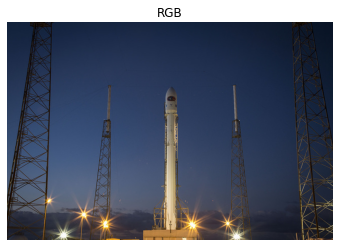

In [20]:
show_image(rocket_image, "RGB")

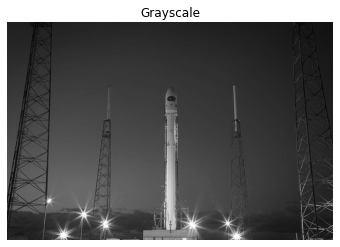

In [21]:
show_image(grayscale, "Grayscale")

In [22]:
coffee_image = data.coffee()
coins_image = data.coins()

In [27]:
np.shape(coffee_image)

(400, 600, 3)

In [28]:
np.shape(coins_image)

(303, 384)

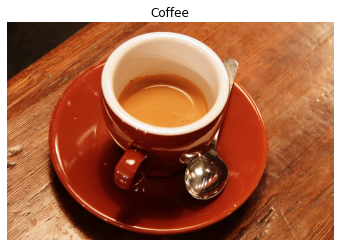

In [30]:
show_image(coffee_image, "Coffee")

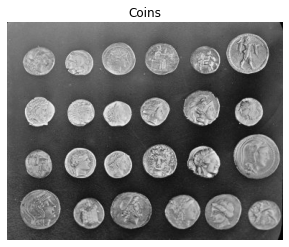

In [31]:
show_image(coins_image, "Coins")

### NumPy for images
* Fundamentals of image processing techniques:
    * Flipping images
    * Extract and analyze features
    
#### Images as NdArrays

```
madrid_image = plt.imread('/madrid.jpeg')
type(madrid_image)
```

In [33]:
type(rocket_image)

numpy.ndarray

* Because images can be represented by NumPy multi-dimensional arrays (aka `NdArrays`)
* NumPy methods for manipulating arrays work well on these images
* **Remember that a color image is a NumPy array with a third dimension for color channels.**
* **We can slice the multidimensional array and obtain these channels separately.** 

#### Colors with NumPy

```
# Obtaining the red values of the image
red = image[:, :, 0]

# Obtaining the green values of the image
green = image[:, :, 1]

# Obtaining the blue values of the image
blue = imaage[:, :, 2]
```
* Here we can see the individual color intensities along the image. For example, we obtain the red color of an image by keeping the height and width pixels and selecting only the values of the first color layer.
* We can also display them using the gray colormap, specifying it with the cmap attribute of the `imshow` function:

```
plt.imshow(red, cmap= 'gray')
plt.title('Red')
plt.axis('off')
plt.show()
```

#### Shapes
* Just like with NumPy arrays, we can get the shape of images.

```
# Accessing the shape of the image
madrid_image.shape
```

In [35]:
rocket_image.shape

(427, 640, 3)

In [36]:
np.shape(rocket_image)

(427, 640, 3)

* The rocket picture is 427 pixels high and 640 pixels wide.
* It has 3 layers for color representation: it's an RGB-3 image.
* It has a total number of pixels of 819,840 (see below).

In [37]:
rocket_image.size

819840

In [38]:
np.size(rocket_image)

819840

#### Flipping images: vertically
* We can flip the image vertically by using the **`flipud()`** method:

```
# Flip the image in an up-down direction
vertically_flipped = np.flipud(madrid_image)

show_image(vertically_flipped, 'Vertically flipped image')
```

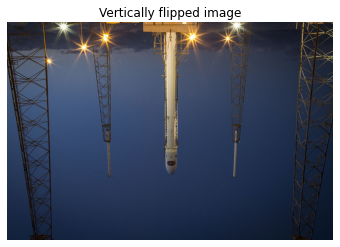

In [39]:
# Flip the image in an up-down direction
vertically_flipped = np.flipud(rocket_image)

show_image(vertically_flipped, 'Vertically flipped image')

#### Flipping images: horizontally

```
# Flip the image in the left-right direction
horizontally_flipped = np.fliplr(madrid_image)

show_image(horizontally_flipped, 'Horizontally flipped image')
```

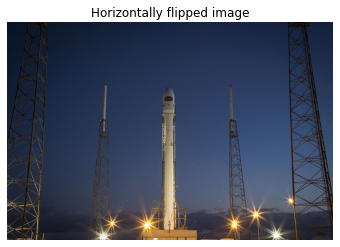

In [40]:
# Flip the image in the left-right direction
horizontally_flipped = np.fliplr(rocket_image)

show_image(horizontally_flipped, 'Horizontally flipped image')

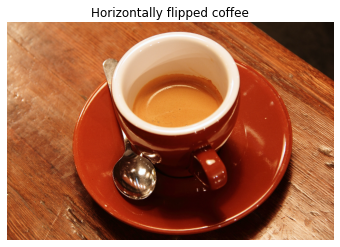

In [41]:
horizontally_flipped_coffee = np.fliplr(coffee_image)

show_image(horizontally_flipped_coffee, 'Horizontally flipped coffee')

#### Image histograms
* The **histogram of an image** is a graphical representation of the amount of pixels of each intensity value
* **Grayscale histograms:**
    * Single histogram for grayscale image pixel distribution
    * 0 = **pure black**
    * 255 = **pure white**
    * For a really **dark grayscale image**, most pixels will have a low intensity (likely from 0 to 50).
    * For a really **light grayscale image**, most pixels will have a high intensity (likelly from 200 to 255).
* **Color histograms:**
    * **Three** histograms for RGB-3 colored image pixel distribution:
        * Red histogram
        * Green histogram
        * Blue histogram
        
#### Application of histograms
* We can learn a lot about an image by just looking at its histogram
    * Analysis
    * Thresholding (an important topic in computer vision that we will cover later in the course)
    * To alter brightness and contrast
    * To equalize an image (also covered later in the course)
* Extracting information from images is a fundamental part of image enhancement. This way you can balance the red and blue to make the image look colder or warmer.

#### Histograms with Matplotlib
* Matplotlib's `histogram()` method takes an **input array** (frequency) and **bins** as parameters.
    * The successive elements in bin array act as the boundary of each bin
    
```
# Red color of the image
red = image[:, :, 0]

# Obtain the red histogram
plt.hist(red.ravel(), bins= 256)
```

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.300e+01, 2.700e+01, 2.700e+01, 3.700e+01, 5.000e+01, 1.010e+02,
        1.570e+02, 2.110e+02, 2.850e+02, 3.440e+02, 3.830e+02, 5.200e+02,
        6.620e+02, 5.510e+02, 5.970e+02, 7.360e+02, 8.690e+02, 8.890e+02,
        7.700e+02, 6.900e+02, 7.090e+02, 8.450e+02, 1.102e+03, 9.540e+02,
        7.280e+02, 7.630e+02, 1.194e+03, 1.329e+03, 1.229e+03, 1.142e+03,
        1.449e+03, 1.284e+03, 1.154e+03, 8.590e+02, 1.067e+03, 7.860e+02,
        1.034e+03, 8.440e+02, 8.720e+02, 8.840e+02, 7.090e+02, 5.080e+02,
        4.340e+02, 6.780e+02, 3.420e+02, 3.900e+02, 4.060e+02, 3.330e+02,
        3.630e+02, 3.350e+02, 2.960e+02, 2.710e+02, 3.060e+02, 3.520e+02,
        2.930e+02, 2.690e+02, 2.840e+02, 3.610e+02, 2.970e+02, 3.320e+02,
        3.310e+02, 3.020e+02, 3.130e+02, 3.230e+02, 3.460e+02, 3.550e+02,
        3.760e+02, 3.630e+02, 3.060e+02, 3.170e+02, 3.630e+02, 3.500e+02,
        3.250e+02, 3.470e+02, 2.670e+0

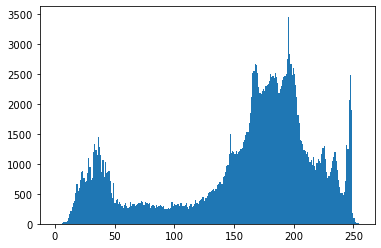

In [42]:
# Red color of the image
red = coffee_image[:, :, 0]

# Obtain the red histogram
plt.hist(red.ravel(), bins= 256)

* Use `.ravel()` to return a continuous flattened array from the color values of the image (in the above case: red).
* We set bins to 256 because we'll show the number of pixels for every pixel value (that is, from 0 to 255).

(array([2878., 7580., 9998., 6828., 4945., 3324., 2110., 2934., 3144.,
        2648., 2859., 3728., 3997., 3112., 4707., 5706., 5834., 5086.,
        3915., 2691., 1935., 1999., 1856., 1771., 1696., 1637., 1464.,
        1590., 1768., 1815., 1843., 1863., 1798., 1682., 1891., 2046.,
        2139., 2189., 2058., 1950., 1786., 2010., 2114., 2149., 2161.,
        2110., 2127., 1756., 2064., 2109., 2270., 2167., 2038., 1867.,
        2130., 2303., 2418., 2362., 2143., 1876., 1501., 1693., 1755.,
        1643., 1492., 1344., 1145., 1025., 1077., 1169., 1154., 1165.,
        1001.,  970.,  789.,  893.,  925.,  937.,  946.,  818.,  718.,
         838.,  877.,  893.,  902.,  850.,  827.,  645.,  799.,  830.,
         842.,  797.,  756.,  652.,  537.,  580.,  567.,  620.,  555.,
         489.,  493.,  454.,  460.,  465.,  458.,  469.,  435.,  362.,
         446.,  431.,  427.,  445.,  452.,  383.,  362.,  421.,  431.,
         472.,  444.,  405.,  404.,  329.,  358.,  370.,  388.,  394.,
      

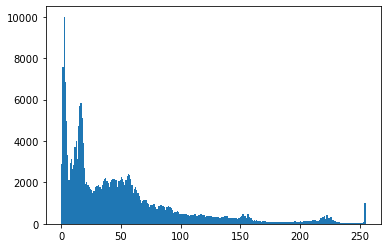

In [43]:
# Red color of the image
blue = coffee_image[:, :, 2]

# Obtain the red histogram
plt.hist(blue.ravel(), bins= 256)

### Getting started with thresholding

* **Thresholding** is used to partition and image into the foreground and the background of *grayscale* images, by essentially making them black and white. 
* We do so by comparing each pixel to a given threshold value and:
    * If the pixel is less than that value, we turn it white ($\Rightarrow$ 255)
    * If the pixel is more than that value, we turn it black ($\Rightarrow$ 0)
* **Thresholding** is the simplest method of **image segmentation** (another topic that will be covered in more detail later).
* Thresholding allows us to **isolate elements** and is used in **object detection**, **facial recognition**, and other applications. 
* Thresholding works best in high-contrast grayscale images
* To threshold *color* images, we must first convert them to grayscale

#### Apply it
* Once an image is loaded,, we need to set the thresh value.
* Below, we've temporarily set it to 127, aa mid-point between 0 and 255
* Finally, show the thresholded image using `show_image()`

```
# Obtain the optimal threshold value
thresh = 127

# Apply thresholding to the image
binary = image > thresh

# Show the original and thresholded
show_image(image, 'Original')
show_image(binary, 'Thresholded')
```

In [47]:
gray_coffee = color.rgb2gray(coffee_image)

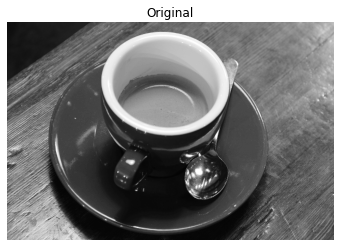

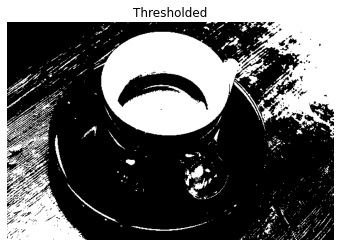

In [63]:
# Obtain the optimal threshold value
thresh = 0.5

# Apply thresholding to the image
binary_coffee = gray_coffee > thresh

# Show the original and thresholded
show_image(gray_coffee, 'Original')
show_image(binary_coffee, 'Thresholded')

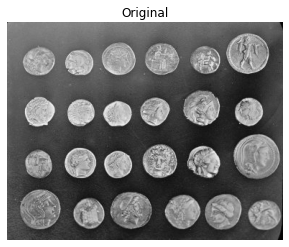

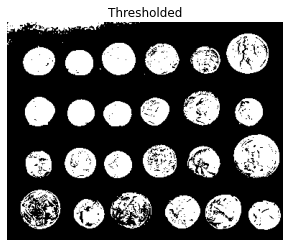

In [56]:
# Obtain the optimal threshold value
thresh = 127

binary_coins = coins_image > thresh

# Show the original and thresholded
show_image(coins_image, 'Original')
show_image(binary_coins, 'Thresholded')

In [53]:
gray_rocket = color.rgb2gray(rocket_image)

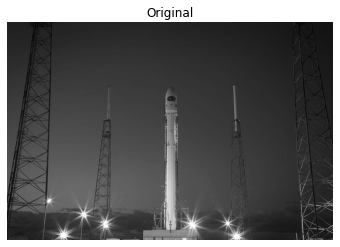

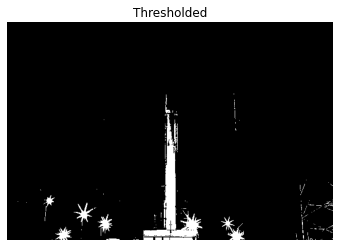

In [62]:
# Obtain the optimal threshold value
thresh = .5

# Apply thresholding to the image
binary_rocket = gray_rocket > thresh

# Show the original and thresholded
show_image(gray_rocket, 'Original')
show_image(binary_rocket, 'Thresholded')

### Inverted thresholding
* Inverting the color.
* Applied in same way as regular thresholing, except that we use `<=`.

```
# Obtain the optimal threshold value
thresh = 127

# Apply thresholding to the image 
inverted_binary = image <= thresh

# Show the original and thresholded 
show_image(image, 'Original')
show_image(inverted_binary, 'Inverted thresholded')
```

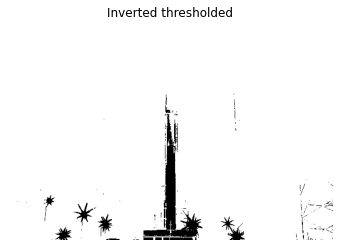

In [71]:
# Obtain the optimal threshold value
thresh = .5

# Apply thresholding to the image
inverted_binary_rocket = gray_rocket <= thresh

show_image(inverted_binary_rocket, 'Inverted thresholded')

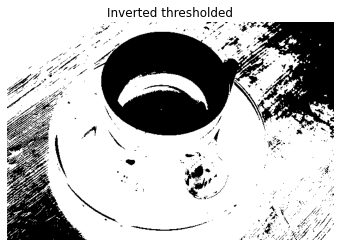

In [72]:
# Obtain the optimal threshold value
thresh = .5

# Apply thresholding to the image
inverted_binary_coffee = gray_coffee <= thresh

show_image(inverted_binary_coffee, 'Inverted thresholded')

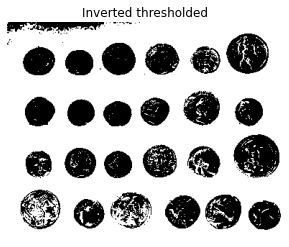

In [73]:
# Obtain the optimal threshold value
thresh = 127

# Apply thresholding to the image
inverted_binary_coins = coins_image <= thresh

show_image(inverted_binary_coins, 'Inverted thresholded')

#### Threshold categories
* **Global or histogram based:** good for uniform (or relatively-uniform) backgrounds
* **Local or adaptive:** for uneven background illumination or background is not easily differentiated.
    * Note that local is **slower** than global thresholding
    
#### Try more thresholding algorithms
* scikit-image includes a function that evaluates several global algorithms, so that you can choose the one that gives you the best results: the **`try_all_threshold`** function from the `filters` module.
* The `try_all_threshold` uses **seven global algorithms** (you will see eight images: the original image + 7 algorithms_

```
from skimage.filters import try_all_threshold

# Obtain all the resulting images
fig, ax = try_all_threshold(image, verbose = False)

# Showing resulting plots
show_plot(fig, ax)
```

In [74]:
from skimage.filters import try_all_threshold

In [78]:
#gray_rocket2 = np.array(gray_rocket, dtype='float')

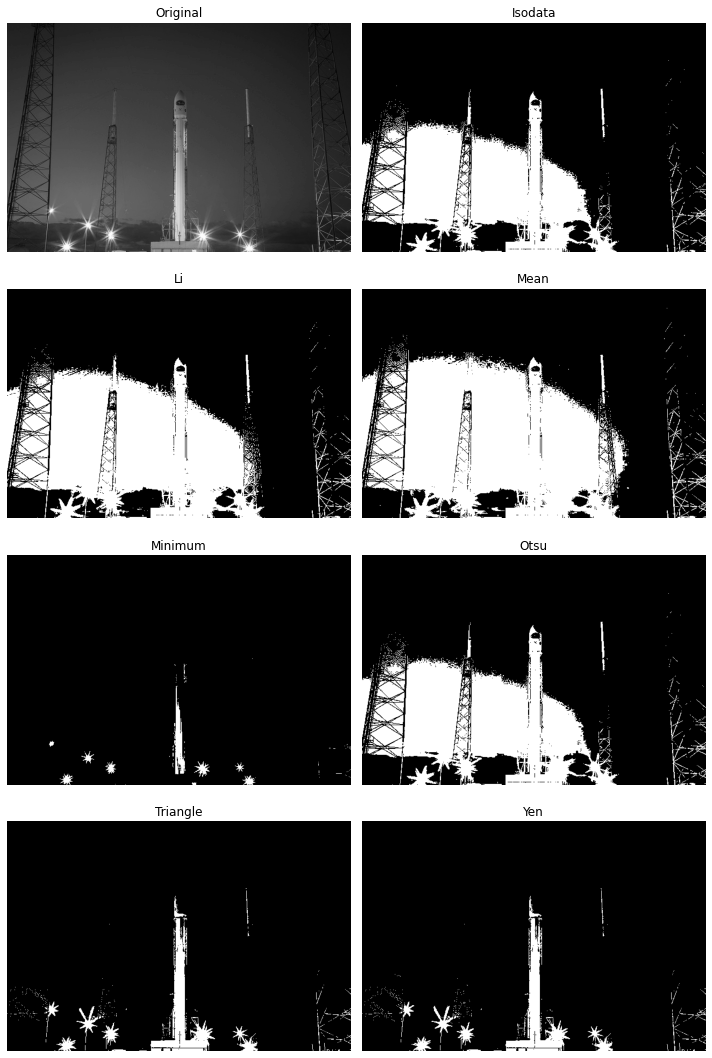

In [85]:
# Obtain all the resulting images
fig, ax = try_all_threshold(gray_rocket, figsize = (10,15), verbose = False)

# Showing resulting plots
plt.show(fig, ax)

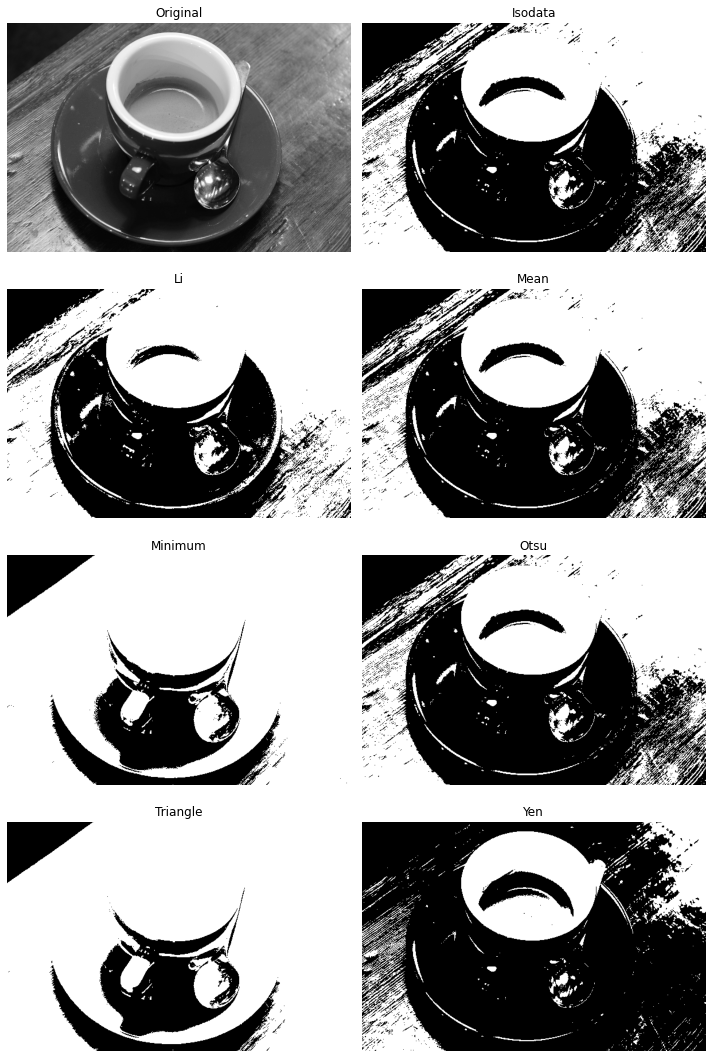

In [87]:
# Obtain all the resulting images
fig, ax = try_all_threshold(gray_coffee, figsize = (10,15), verbose = False)

# Showing resulting plots
plt.show(fig, ax)

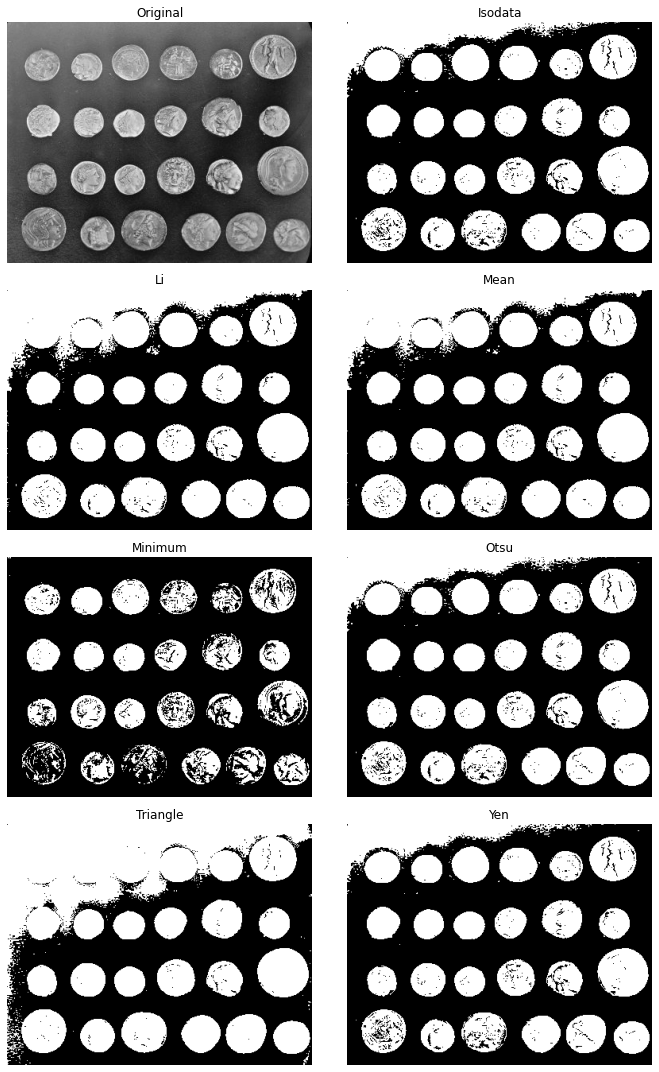

In [86]:
# Obtain all the resulting images
fig, ax = try_all_threshold(coins_image, figsize = (10,15), verbose = False)

# Showing resulting plots
plt.show(fig, ax)

* In this course, we only cover the **Otsu method**.

### Optimal thresh value
#### Global
* When an image seems to have a **uniform background**, global thresholding usually works best. 
* Previously, we arbitrarily set the thresh value, but we can also calculate the optimal value.
* For that, we import the `threshold_otsu()` function.
* Then, obtain the optimal global thresh value by calling the `threshold_otsu()` function.
* Then, apply the local thresh to the image

```
# Import the otsu threshold function
from skimage.filters import threshold_otsu

# Obtain the optimal threshold value 
thresh = threshold_otsu(image)

# Apply thresholding to the image
binary_global = image > thresh

# Show the original and binarized image
show_image(image, 'Original')
show_image(binary_global, 'Global thresholding')
```

In [88]:
from skimage.filters import threshold_otsu

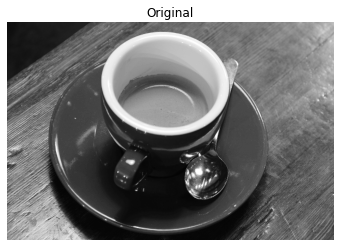

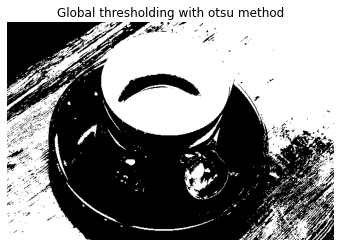

In [101]:
# Obtain the optimal threshold value 
thresh_coffee = threshold_otsu(gray_coffee)

# Apply thresholding to the image
binary_global_coffee = gray_coffee > thresh_coffee

# Show the original and binarized image
show_image(gray_coffee, 'Original')
show_image(binary_global_coffee, 'Global thresholding with otsu method')

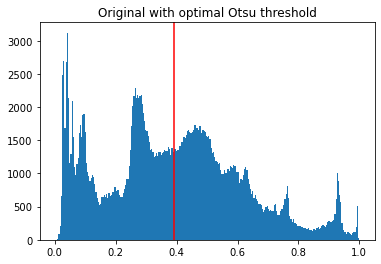

In [102]:
# Plot threshold on histogram
plt.hist(gray_coffee.ravel(), bins= 256)
plt.axvline(x=thresh_coffee, color='red')
plt.title('Original with optimal Otsu threshold')
plt.show()

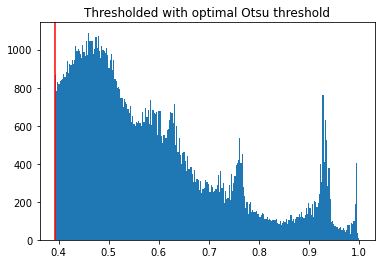

In [103]:
# Plot threshold on histogram
plt.hist(gray_coffee[binary_global_coffee].ravel(), bins= 256)
plt.axvline(x=thresh_coffee, color='red')
plt.title('Thresholded with optimal Otsu threshold')
plt.show()

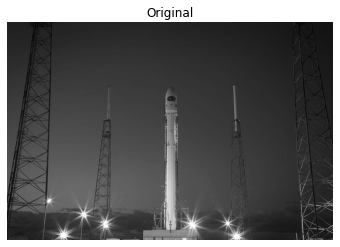

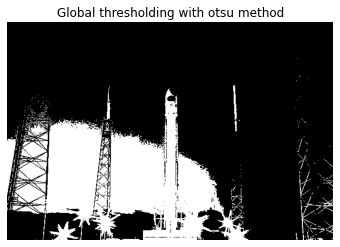

In [104]:
# Obtain the optimal threshold value 
thresh_rocket = threshold_otsu(gray_rocket)

# Apply thresholding to the image
binary_global_rocket = gray_rocket > thresh_rocket

# Show the original and binarized image
show_image(gray_rocket, 'Original')
show_image(binary_global_rocket, 'Global thresholding with otsu method')

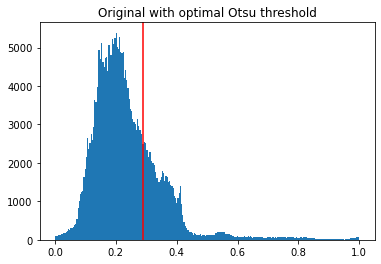

In [105]:
# Plot threshold on histogram
plt.hist(gray_rocket.ravel(), bins= 256)
plt.axvline(x=thresh_rocket, color='red')
plt.title('Original with optimal Otsu threshold')
plt.show()

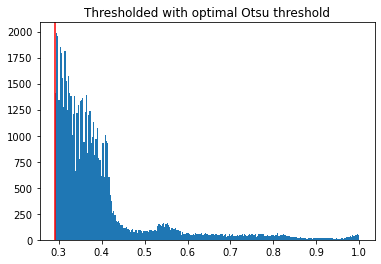

In [106]:
# Plot threshold on histogram
plt.hist(gray_rocket[binary_global_rocket].ravel(), bins= 256)
plt.axvline(x=thresh_rocket, color='red')
plt.title('Thresholded with optimal Otsu threshold')
plt.show()

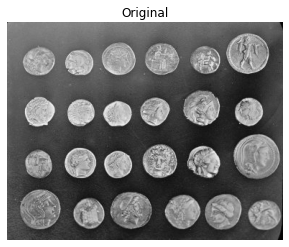

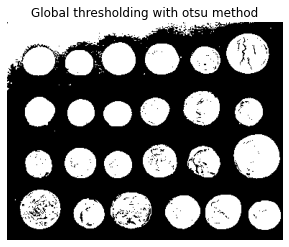

In [107]:
# Obtain the optimal threshold value 
thresh_coins = threshold_otsu(coins_image)

# Apply thresholding to the image
binary_global_coins = coins_image > thresh_coins

# Show the original and binarized image
show_image(coins_image, 'Original')
show_image(binary_global_coins, 'Global thresholding with otsu method')

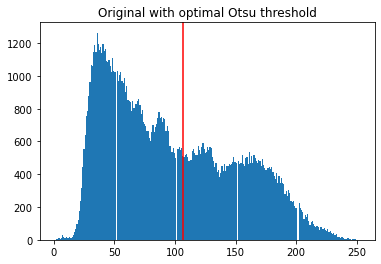

In [108]:
# Plot threshold on histogram
plt.hist(coins_image.ravel(), bins= 256)
plt.axvline(x=thresh_coins, color='red')
plt.title('Original with optimal Otsu threshold')
plt.show()

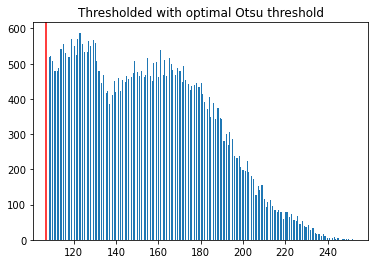

In [109]:
# Plot threshold on histogram
plt.hist(coins_image[binary_global_coins].ravel(), bins= 256)
plt.axvline(x=thresh_coins, color='red')
plt.title('Thresholded with optimal Otsu threshold')
plt.show()

### Local
* If the image **doesn't have high contrast** or the **background is uneven**, local thresholding produces better results
* Import **`threshold_local()`**, also from the `filters` module.
* With this function, we calculate thresholds in small pixel regions surrounding each pixel we are binarizing
* So, we need to specify a `block_size` to surround each pixel, also known as `local_neighborhoods`.
* And lastly, an optional `offset`, which is a constant subtracted from the mean of blocks to calculate the local threshold value.

```
# Import the local threshold function
from skimage.filters import threshold_local

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(text_image, block_size, offset=10)

# Apply local thresholding and obtain the binary image
binary_local = text_image > local_thresh

# Show the original and binarized image
show_image(image, 'Original')
show_image(binary_local, 'Local thresholding')
```

In [110]:
from skimage.filters import threshold_local

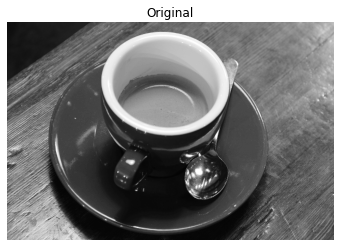

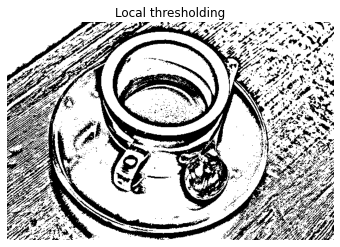

In [117]:
# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh_coffee = threshold_local(gray_coffee, block_size, offset=0.02)

# Apply local thresholding and obtain the binary image
binary_local_coffee = gray_coffee > local_thresh_coffee

# Show the original and binarized image
show_image(gray_coffee, 'Original')
show_image(binary_local_coffee, 'Local thresholding')

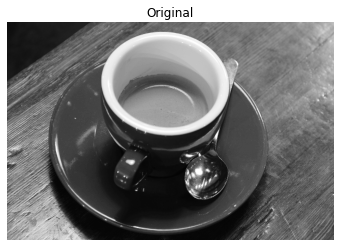

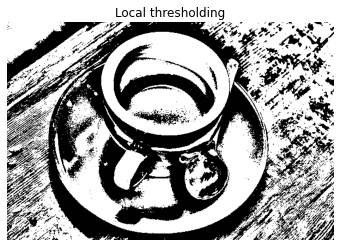

In [121]:
# Set the block size to 35
block_size = 99

# Obtain the optimal local thresholding
local_thresh_coffee = threshold_local(gray_coffee, block_size, offset=0.02)

# Apply local thresholding and obtain the binary image
binary_local_coffee = gray_coffee > local_thresh_coffee

# Show the original and binarized image
show_image(gray_coffee, 'Original')
show_image(binary_local_coffee, 'Local thresholding')

### Different block sizes
#### Coffee

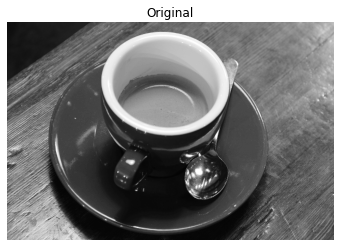

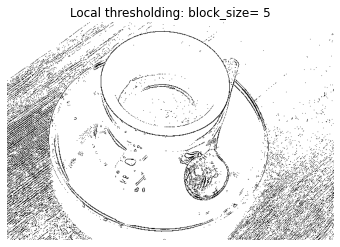

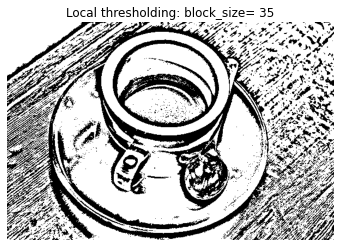

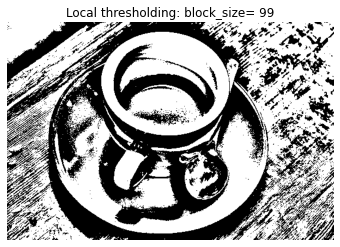

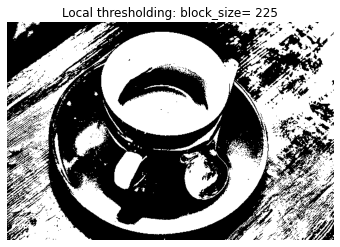

In [132]:
show_image(gray_coffee, 'Original')
block_size = [5, 35, 99, 225]

for bsize in block_size:
    # Obtain the optimal local thresholding
    local_thresh_coffee = threshold_local(gray_coffee, bsize, offset=0.02)

    # Apply local thresholding and obtain the binary image
    binary_local_coffee = gray_coffee > local_thresh_coffee

    # Show the original and binarized image
    show_image(binary_local_coffee, 'Local thresholding: block_size= '+ str(bsize))

#### Rocket

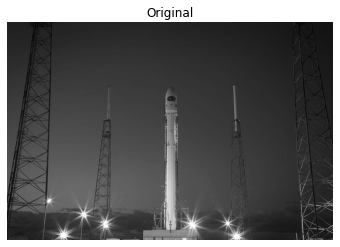

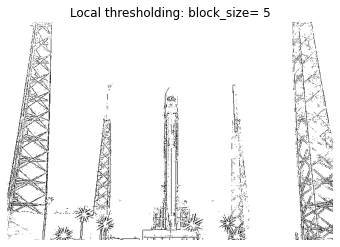

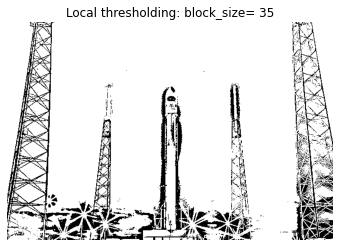

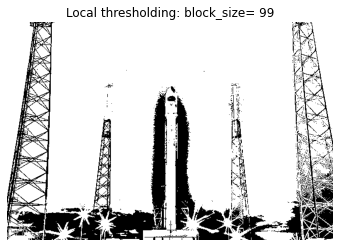

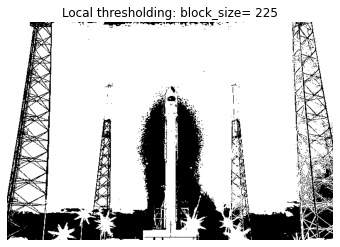

In [135]:
show_image(gray_rocket, 'Original')
block_size = [5, 35, 99, 225]
for bsize in block_size:
    local_thresh_rocket = threshold_local(gray_rocket, bsize, offset=0.02)
    binary_local_rocket = gray_rocket > local_thresh_rocket
    show_image(binary_local_rocket, 'Local thresholding: block_size= '+ str(bsize))

#### Coins: offset=10

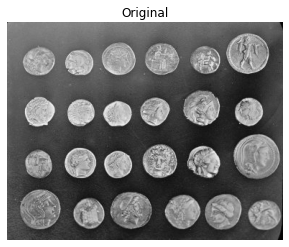

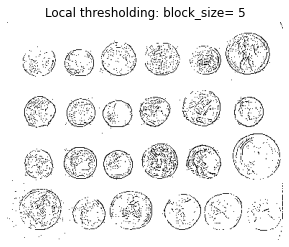

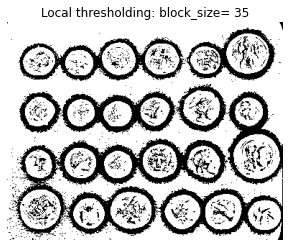

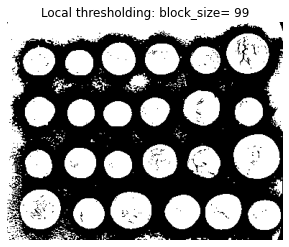

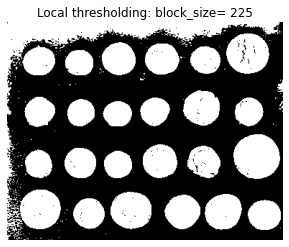

In [139]:
show_image(coins_image, 'Original')
block_size = [5, 35, 99, 225]
for bsize in block_size:
    local_thresh_coins = threshold_local(coins_image, bsize, offset=10)
    binary_local_coins = coins_image > local_thresh_coins
    show_image(binary_local_coins, 'Local thresholding: block_size= '+ str(bsize))

#### Coins: offset = 0.02

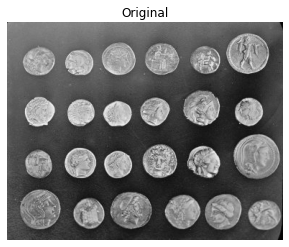

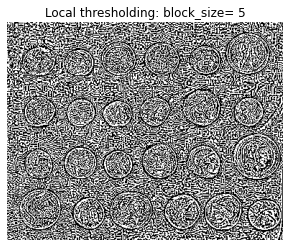

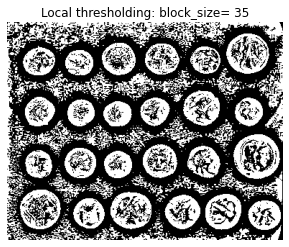

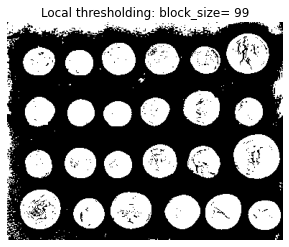

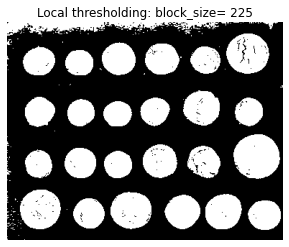

In [140]:
show_image(coins_image, 'Original')
block_size = [5, 35, 99, 225]
for bsize in block_size:
    local_thresh_coins = threshold_local(coins_image, bsize, offset=0.02)
    binary_local_coins = coins_image > local_thresh_coins
    show_image(binary_local_coins, 'Local thresholding: block_size= '+ str(bsize))

#### Apply global thresholding
In this exercise, you'll transform a photograph to binary so you can separate the foreground from the background.

To do so, you need to import the required modules, load the image, obtain the optimal thresh value using `threshold_otsu()` and apply it to the image.

You'll see the resulting binarized image when using the `show_image()` function, previously explained.

Remember we have to turn colored images to grayscale. For that we will use the `rgb2gray()` function learned in previous video. Which has already been imported for you.


```
# Import the otsu threshold function
from skimage.filters import threshold_otsu

# Make the image grayscale using rgb2gray
chess_pieces_image_gray = rgb2gray(chess_pieces_image)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image
binary = chess_pieces_image_gray > thresh

# Show the image
show_image(binary, 'Binary image')
```

#### When the background isn't that obvious
Sometimes, it isn't that obvious to identify the background. If the image background is relatively uniform, then you can use a global threshold value as we practiced before, using `threshold_otsu()`. However, if there's uneven background illumination, adaptive thresholding `threshold_local()` (a.k.a. local thresholding) may produce better results.

In this exercise, you will compare both types of thresholding methods (global and local), to find the optimal way to obtain the binary image we need.


Global:

```
# Import the otsu threshold function
from skimage.filters import threshold_otsu

# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(page_image)

# Obtain the binary image by applying global thresholding
binary_global = page_image > global_thresh

# Show the binary image obtained
show_image(binary_global, 'Global thresholding')
```
Local:

```
# Import the local threshold function
from skimage.filters import threshold_local

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(page_image, block_size, offset=10)

# Obtain the binary image by applying local thresholding
binary_local = page_image > local_thresh

# Show the binary image
show_image(binary_local, 'Local thresholding')
```

In [151]:
page_image = data.page()

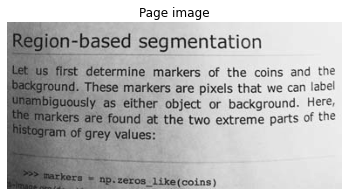

In [152]:
show_image(page_image, "Page image")

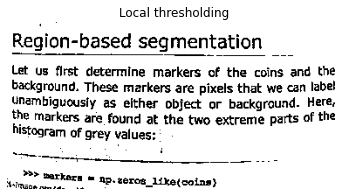

In [156]:
# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(page_image, block_size, offset=10)

# Obtain the binary image by applying local thresholding
binary_local = page_image > local_thresh

# Show the binary image
show_image(binary_local, 'Local thresholding')

#### Trying other methods
As we saw in the video, not being sure about what thresholding method to use isn't a problem. In fact, scikit-image provides us with a function to check multiple methods and see for ourselves what the best option is. It returns a figure comparing the outputs of different global thresholding methods.

You will apply this function to this image, `matplotlib.pyplot` has been loaded as `plt`. Remember that you can use `try_all_threshold()` to try multiple global algorithms.

```
# Import the try all function
from skimage.filters import try_all_threshold

# Import the rgb to gray convertor function 
from skimage.color import rgb2gray

# Turn the fruits_image to grayscale
grayscale = rgb2gray(fruits_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False)

# Show the resulting plots
plt.show()
```

#### Applying thresholding
In this exercise, you will decide what type of thresholding is best used to binarize an image of knitting and craft tools. In doing so, you will be able to see the shapes of the objects, from paper hearts to scissors more clearly.

What type of thresholding would you use judging by the characteristics of the image? Is the background illumination and intensity even or uneven?

```
# Import threshold and gray convertor functions
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# Turn the image grayscale
gray_tools_image = rgb2gray(tools_image)

# Obtain the optimal thresh
thresh = threshold_otsu(gray_tools_image)

# Obtain the binary image by applying thresholding
binary_image = gray_tools_image > thresh

# Show the resulting binary image
show_image(binary_image, 'Binarized image')
```

# $\star$ Chapter 2: Filters, Contrast, Transformation and Morphology
You will learn to **detect object shapes** using edge detection filters, **improve medical images** with contrast enhancement **and even enlarge pictures to five times their original size!** You will also **apply morphology** to make thresholding more accurate when segmenting images and go to the next level of processing images with Python.

## Jump into filtering

### Filters
* **Filtering** is a technique for modifying or enhancing an image.
* In essence, a filter is a **mathematical function** that is applied to images.
* It can be used to **emphasize** or **deemphasize** certain features, like edges:
    * **Smoothing**
    * **Sharpening**
    * **Edge detection**

### Neighborhoods
* Filtering is a **neighborhood operation**.
* Certain image processing operations involve proccessing an image in sections (called **blocks** or **neighborhoods**), rather than processing the entire image at once.
    * This is the case for filtering, **histogram equilization for contrast enhancement**, and **morphological functions**, all three of which use this approach of neighborhood operations.
    
## Edge detection
* With filtering, we can detect edges
* This technique can be used to find the boundaries of objects within images, as well as segment and extract information like how many coins are in an image.
* Most of the **shape** information of an image is enclosed in edges.
* **Edge detection** works by detecting discontinuities in brightness

#### Sobel
* A common edge detection algorithm is **Sobel**.
* This is a filter that we can find in scikit image's module `filters`
* The `sobel` function requires a 2-dimensional grayscale image as input.
* In the case of a colored image, we'll need to convert it to grayscale first

```
# Import module and function
from skimage.filters import sobel

# Apply edge detection filter
edge_sobel = sobel(image_coins)

# Show original and resulting image to compare
plot_comparison(image_coins, edge_sobel, "Edge with Sobel")
```
* We see that the filter is detecting the edges in the original image and highlighting the boundaries as closed lines in the resulting image
* This is the **`plot_comparison`** function used above:

In [171]:
def plot_comparison(original, filtered, title_filtered):
    
    fig, (ax1, ax2) = plt.subplots(ncols= 2, figsize=(12, 8), sharex= True, sharey= True)
    ax1.imshow(original, cmap = plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap= plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

In [168]:
from skimage.filters import sobel

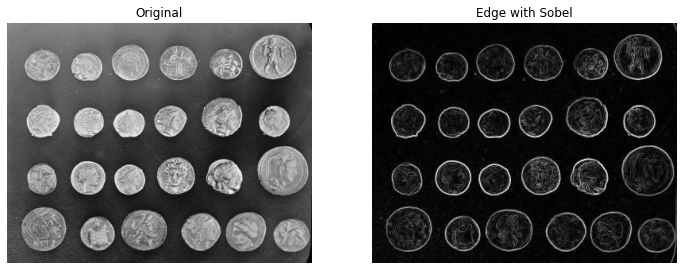

In [172]:
# Apply edge detection filter
edge_sobel = sobel(coins_image)

# Show original and resulting image to compare
plot_comparison(coins_image, edge_sobel, "Edge with Sobel")

## Gaussian smoothing
* Another filtering technique: smoothing
* This technique is typically used to blur an image or to reduce noise
* The **Gaussian filter** will blur edges and reduce contrast.
* This is used in other techniques like **anti-aliasing filtering**.

* Import the Gaussian function from the `filters` module of scikit-image
* The `multichannel` boolean parameter is set to `True` if the image is **colored**, otherwise it needs to be set to `False`.

```
# from skimage.filters import gaussian

# Apply edge detection filter
gaussian_image = gaussian(amsterdam_pic, multichannel= True)

# Show original and resulting image to compare
plot_compareison(amsterdam_pic, gaussian_image, "Blurred with Gaussian filter")
```

In [174]:
from skimage.filters import gaussian

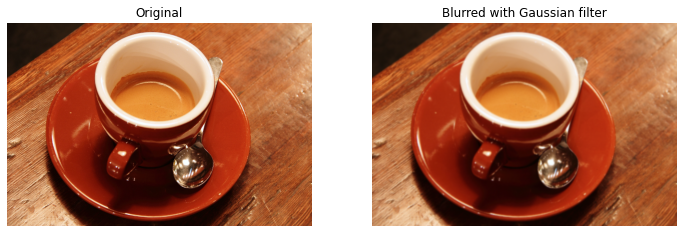

In [177]:
# from skimage.filters import gaussian

# Apply edge detection filter
gaussian_image_coffee = gaussian(coffee_image, multichannel= True)

# Show original and resulting image to compare
plot_comparison(coffee_image, gaussian_image_coffee, "Blurred with Gaussian filter")

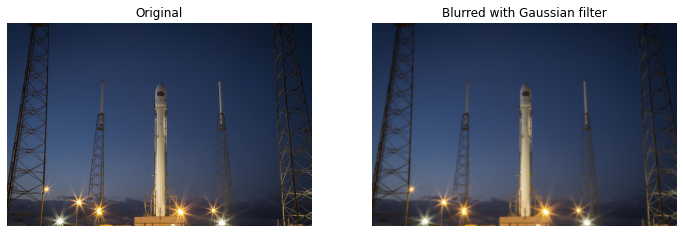

In [178]:
gaussian_image_rocket = gaussian(rocket_image, multichannel= True)
plot_comparison(rocket_image, gaussian_image_rocket, "Blurred with Gaussian filter")

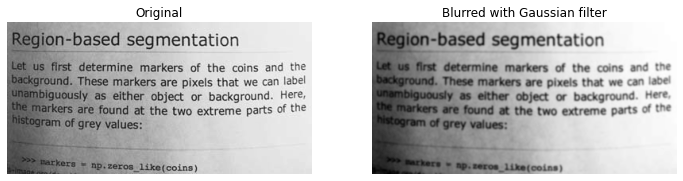

In [179]:
gaussian_image_page = gaussian(page_image, multichannel= False)
plot_comparison(page_image, gaussian_image_page, "Blurred with Gaussian filter")

* Sometimes when the image is too large, meaning it has a big resolution, we do not easily see the effect
* Gaussian filter blurs the image and removes the noise. 